In [1]:
# importando bibliotecas que serão utilizadas
# é uma boa pratica de programação importa-las 
# no inicio e não no meio do código

import random # gerador de números aleatórios
import numpy as np # biblioteca Numpy para manipulação de Matrizes
import pandas as pd # biblioteca Pandas é usada para manipulação de Tabelas
import matplotlib.pyplot as plt # biblioteca para visualização dos dados

from sklearn.preprocessing import StandardScaler # modulo para padronizar os dados
from sklearn.preprocessing import MinMaxScaler # modulo para normalizar os dados
from sklearn.decomposition import PCA # modulo para aplicar PCA nos dados

random.seed(1) # inicia a semente do gerador de números aleatórios. Importante para reprodução dos resultados

## 1)

>Para os dados da iris com erros, após remover as linhas contendo NaN e '?', quantas observações sobraram?

In [2]:
# CSV file
data = pd.read_csv('data/iris.csv') # leitura do arquivo csv

In [3]:
data.shape

(150, 5)

In [4]:
# remover valores nulos
data = data.replace('?', np.nan) # substitui '?' por valores nulos
data = data.dropna() # remove os valores nulos

In [5]:
data.shape

(150, 5)

## 2)

> Usando a distância interquantil e o critério de que uma observação é um outlier se ao menos uma das variáveis está fora dos limites máximos do boxplot, quantos outliers há nos dados da Iris? (Veja o exemplo da aula)

In [6]:
# Para encontrar outliers podemos utilizar a diferença interquartil como demonstrado em aula
# Como precisamos encontrar os outliers para os dois conjuntos de dados,
# podemos criar uma função para reutilizar em ambos

def detecta_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    matches = ((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr)))
    return df[matches.any(1)]

def firstQuartil(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    
    return q1, q3, iqr
    

In [7]:
# leitura do arquivo csv
iris = pd.read_csv('data/iris.csv')

# elimina a variavel target para o processo de deteção de outliers
iris = iris.drop(columns='species')

detecta_outliers(iris)


,sepal_length,sepal_width,petal_length,petal_width
15,5.7,4.4,1.5,0.4
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2
60,5.0,2.0,3.5,1.0


In [8]:
firstQuartil(iris)

(sepal_length    5.1
 sepal_width     2.8
 petal_length    1.6
 petal_width     0.3
 Name: 0.25, dtype: float64, sepal_length    6.4
 sepal_width     3.3
 petal_length    5.1
 petal_width     1.8
 Name: 0.75, dtype: float64, sepal_length    1.3
 sepal_width     0.5
 petal_length    3.5
 petal_width     1.5
 dtype: float64)

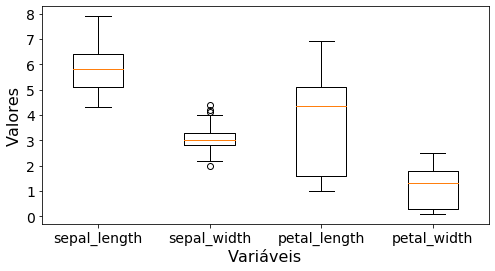

In [9]:
data = iris.replace('?', np.nan) # substitui '?' por valores nulos
data = data.apply(pd.to_numeric)
data = data.fillna(data.median())

plt.figure(figsize=(8, 4))
plt.boxplot(data.values)
plt.xticks(np.arange(1, len(data.columns) + 1), data.columns)
plt.xlabel('Variáveis', fontsize=16)
plt.ylabel('Valores', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

## 3)

> Usando a distância interquantil e o critério de que uma observação é um outlier se ao menos uma das variáveis está fora dos limites máximos do boxplot, quantos outliers há nos dados BostonHouse?

In [10]:
# leitura do arquivo csv
boston = pd.read_csv('data/BostonHousing.csv')

# variavel nox e medv podem ser usadas em tarefas preditivas,
# porem como não sabemos qual delas será o target,
# utilizamos todo o conjunto de dados, caso contrário as variaveis
# deveriam ser descartadas para a analise de outliers
# https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

detecta_outliers(boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
18,0.80271,0.0,8.14,0,0.538,5.456,36.6,3.7965,4,307,21.0,288.99,11.69,20.2
25,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307,21.0,303.42,16.51,13.9
27,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307,21.0,306.38,17.28,14.8
32,1.38799,0.0,8.14,0,0.538,5.950,82.0,3.9900,4,307,21.0,232.60,27.71,13.2
34,1.61282,0.0,8.14,0,0.538,6.096,96.9,3.7598,4,307,21.0,248.31,20.34,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
478,10.23300,0.0,18.10,0,0.614,6.185,96.7,2.1705,24,666,20.2,379.70,18.03,14.6
479,14.33370,0.0,18.10,0,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0


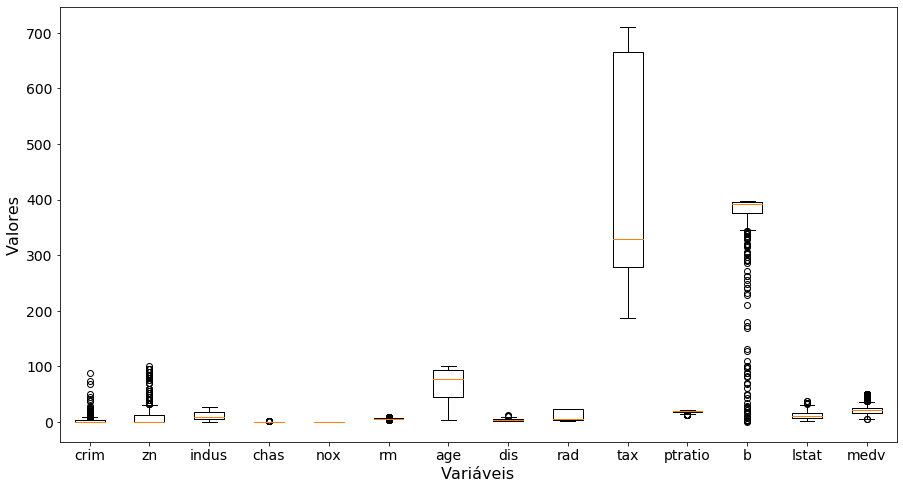

In [17]:
data = boston.replace('?', np.nan) # substitui '?' por valores nulos
data = data.apply(pd.to_numeric)
data = data.fillna(data.median())

plt.figure(figsize=(15, 8))
plt.boxplot(data.values)
plt.xticks(np.arange(1, len(data.columns) + 1), data.columns)
plt.xlabel('Variáveis', fontsize=16)
plt.ylabel('Valores', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

## 5)

> Quantas variáveis são necessárias para se explicar ao menos 90% da variância nos dados Vehicle?

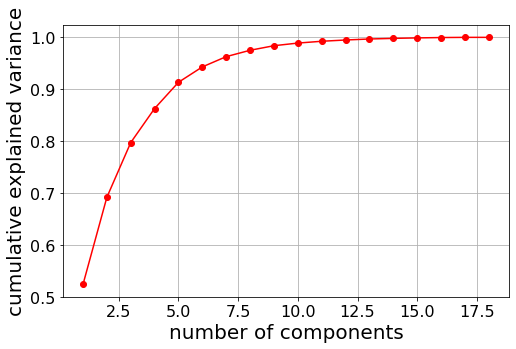

In [12]:
vhc = pd.read_csv('data/Vehicle.csv')

vhc = vhc.drop(columns='Class')

# Como temos 14 variaveis, podemos reduzir a dimensionalidade para qualquer valor abaixo disso
# Portanto, criamos uma lista com todas possibilidades para analizarmos qual é o minimo
# dimensoes que podemos reduzir ainda sendo possivel explicar sua variancia
n_components_values = np.arange(1, len(vhc.columns) + 1)

# Vamos padronizar os dados, de modo a evitar o efeito da escala dos atributos.
scaler = StandardScaler().fit(vhc)
vhc_transformed = scaler.transform(vhc)

# instanciamos o PCA sem especificar o numero de componentes que desejamos
# em seguida ajustamos ao nosso conjunto de dados
pca = PCA().fit(vhc_transformed)

# mostra a variância acumulada para todos os possiveis numeros de componentes
# Notamos que com apenas duas variaveis conseguimos explicar 95% da variancia dos dados
plt.figure(figsize=(8, 5))
plt.plot(n_components_values, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=16)
plt.yticks(color='k', size=16)
plt.grid(True)
plt.show(True)

## 4)

> Quantas variáveis são necessárias para se explicar ao menos 80% da variância nos dados BostonHousing?

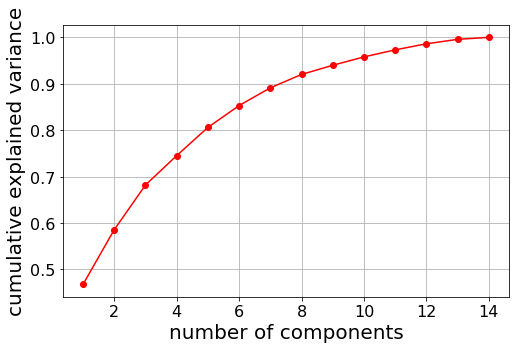

In [13]:
boston = pd.read_csv('data/BostonHousing.csv')

# Como temos 14 variaveis, podemos reduzir a dimensionalidade para qualquer valor abaixo disso
# Portanto, criamos uma lista com todas possibilidades para analizarmos qual é o minimo
# dimensoes que podemos reduzir ainda sendo possivel explicar sua variancia
n_components_values = np.arange(1, len(boston.columns) + 1)

# Vamos padronizar os dados, de modo a evitar o efeito da escala dos atributos.
scaler = StandardScaler().fit(boston)
boston_transformed = scaler.transform(boston)

# instanciamos o PCA sem especificar o numero de componentes que desejamos
# em seguida ajustamos ao nosso conjunto de dados
pca = PCA().fit(boston_transformed)

plt.figure(figsize=(8, 5))
plt.plot(n_components_values, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=16)
plt.yticks(color='k', size=16)
plt.grid(True)
plt.show(True)